# Movement data analysis

Analyze the movement data collected during the experiment

## Import data and libraries

In [1]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap
from branca.colormap import linear
from geolib import geohash as geolib
import json
import math
import random
import arc_drawer

/Users/colombmo/Documents/Lavoro/SWICE/Software/tests/OSMnx/osmnx/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Defined legend
legend_html = '''
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 160px; height: 300px; 
                 background-color: white; border:2px solid grey; z-index:9999; 
                 font-size:14px;">
     &nbsp; <b>Legend</b> <br>
     &nbsp; Walking &nbsp; <i class="fa fa-square" style="color:#7FC97F"></i><br>
     &nbsp; On Bicycle &nbsp; <i class="fa fa-square" style="color:#BDAED4"></i><br>
     &nbsp; Train &nbsp; <i class="fa fa-square" style="color:#FDBF85"></i><br>
     &nbsp; Bus &nbsp; <i class="fa fa-square" style="color:#FFFF99"></i><br>
     &nbsp; Electric Bus &nbsp; <i class="fa fa-square" style="color:#FFFF99"></i><br>
     &nbsp; Car &nbsp; <i class="fa fa-square" style="color:#386CB0"></i><br>
     &nbsp; Tram &nbsp; <i class="fa fa-square" style="color:#F0027F"></i><br>
     &nbsp; Plane &nbsp; <i class="fa fa-square" style="color:#BE5B17"></i><br>
     &nbsp; Boat &nbsp; <i class="fa fa-square" style="color:#BE5B17"></i><br>
      </div>
     '''

In [3]:

# Read the data from the csv
df = gpd.read_file('data/Test_movements.csv')
df

,participant_id,start_time,end_time,start_geohash,end_geohash,distance(m),mean_of_transport,original_mean_of_transport,is_power_saving,geometry
0,2199231E2,2024-07-05 07:20:28+00:00,2024-07-05 07:20:48+00:00,u0m44x,u0m46b,1298,ON_BICYCLE,CAR,False,None
1,2199231E2,2024-07-05 22:09:13+00:00,2024-07-05 22:35:08+00:00,u0m44z,u0m44x,1354,WALKING,WALKING,False,None
2,2199231E2,2024-07-08 06:40:47+00:00,2024-07-08 06:46:29+00:00,u0m46b,u0m44x,758,ON_BICYCLE,ON_BICYCLE,False,None
3,2199231E2,2024-07-14 09:34:33+00:00,2024-07-14 10:34:41+00:00,u0m3ed,u0m3e5,1939,WALKING,WALKING,False,None
4,2199231E2,2024-07-18 05:09:04+00:00,2024-07-18 05:41:19+00:00,u0kb8b,u0k2ne,37296,TRAIN,TRAIN,False,None
...,...,...,...,...,...,...,...,...,...,...
1566,1199121CX,2024-08-21 11:45:19+00:00,2024-08-21 11:57:15+00:00,u0m44x,u0m468,495,WALKING,WALKING,False,None
1567,1199121CX,2024-08-21 11:57:16+00:00,2024-08-21 12:02:08+00:00,u0m468,u0m44y,997,ELECTRIC_BUS,ELECTRIC_BUS,False,None
1568,1199121CX,2024-08-21 12:59:19+00:00,2024-08-21 13:11:00+00:00,u0m44y,u0m44y,393,WALKING,WALKING,False,None
1569,1199121CX,2024-08-21 15:54:12+00:00,2024-08-21 16:10:53+00:00,u0m44y,u0m44x,1234,WALKING,WALKING,False,None


In [4]:
# Remove 2 last characters of geohash
#df['start_geohash'] = df['start_geohash'].str[:-1]
#df['end_geohash'] = df['end_geohash'].str[:-1]

In [5]:
## Convert distance to int
df['distance(m)'] = df['distance(m)'].astype(int)

In [6]:
## Get a list of all the unique participants in df, including the number of occurrences of each participant
participants = df['participant_id'].value_counts()
participants

participant_id
219935XE1     429
1199121CX     323
2199231E2     252
119963XR1     158
119817XU1     154
220092XJ1      89
219957XAX      58
219613XI1      42
119928XAX      31
1199393SX      18
21975111GX     17
Name: count, dtype: int64

In [7]:
## Get the list of movements with each mean of transport
df['mean_of_transport'].value_counts()

mean_of_transport
WALKING            726
TRAIN              249
ON_BICYCLE         184
ELECTRIC_BUS       106
CAR                 92
ELECTRIC_BIKE       91
SCOOTER             44
BUS                 35
TRAM                23
ELECTRIC_CAR         7
BOAT                 6
HYBRID_CAR           6
PLANE                1
DETECTION_ERROR      1
Name: count, dtype: int64

In [8]:
# Get the distance covered with each mean of transport (in km)
df.groupby('mean_of_transport')['distance(m)'].sum()/1000

mean_of_transport
BOAT                  90.898
BUS                  142.210
CAR                 2621.505
DETECTION_ERROR        3.354
ELECTRIC_BIKE        254.626
ELECTRIC_BUS         169.091
ELECTRIC_CAR          71.905
HYBRID_CAR            62.146
ON_BICYCLE           698.329
PLANE                 47.206
SCOOTER               51.219
TRAIN              11313.721
TRAM                  33.218
WALKING              846.631
Name: distance(m), dtype: float64

In [9]:
# Transform the start_ and end_date to a date only
df['start_time'] = pd.to_datetime(df['start_time']).dt.date
df['end_time'] = pd.to_datetime(df['end_time']).dt.date

In [10]:
df.groupby(['participant_id', 'mean_of_transport', 'start_time'])['distance(m)'].sum()/1000

participant_id  mean_of_transport  start_time
119817XU1       BUS                2024-07-06      0.944
                CAR                2024-07-06      4.835
                                   2024-07-12    109.663
                                   2024-07-22      3.074
                                   2024-07-23      2.284
                                                  ...   
220092XJ1       WALKING            2024-07-14      0.336
                                   2024-07-15      0.553
                                   2024-07-19      0.304
                                   2024-07-20      1.682
                                   2024-07-21      1.353
Name: distance(m), Length: 633, dtype: float64

In [11]:
# Get the distance covered by each mean of transport per day, per user. On the days where the user used the mean of transport.
dist_per_day = df.groupby(['participant_id', 'mean_of_transport', 'start_time'])['distance(m)'].sum()/1000


# Get the average per mean of transport across all users. Which means the average of the average_dist
mean_daily = dist_per_day.groupby('mean_of_transport').mean()
std_daily = dist_per_day.groupby('mean_of_transport').std()

# Merge and print
daily = pd.concat([mean_daily, std_daily], axis=1)
daily.columns = ['mean', 'std']
daily


,mean,std
mean_of_transport,,
BOAT,22.724500,43.105379
BUS,5.267037,5.812229
CAR,50.413558,92.064664
DETECTION_ERROR,3.354000,NaN
ELECTRIC_BIKE,7.957063,7.723336
ELECTRIC_BUS,2.348486,1.940195
ELECTRIC_CAR,23.968333,20.527125
HYBRID_CAR,20.715333,8.193530
ON_BICYCLE,9.835620,14.069182


In [12]:
dist_per_day = dist_per_day.reset_index()

In [13]:
# Plot as a violin plot
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/0v/mryc8sr57kb1272k8bhj0z083fl3sj/T/ipykernel_12485/1236318022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='mean_of_transport', y='distance(m)', data=dist_per_day, inner='box', linewidth=1.5, saturation=0.8, width=0.8, cut=0, palette='viridis')


<Axes: xlabel='mean_of_transport', ylabel='distance(m)'>

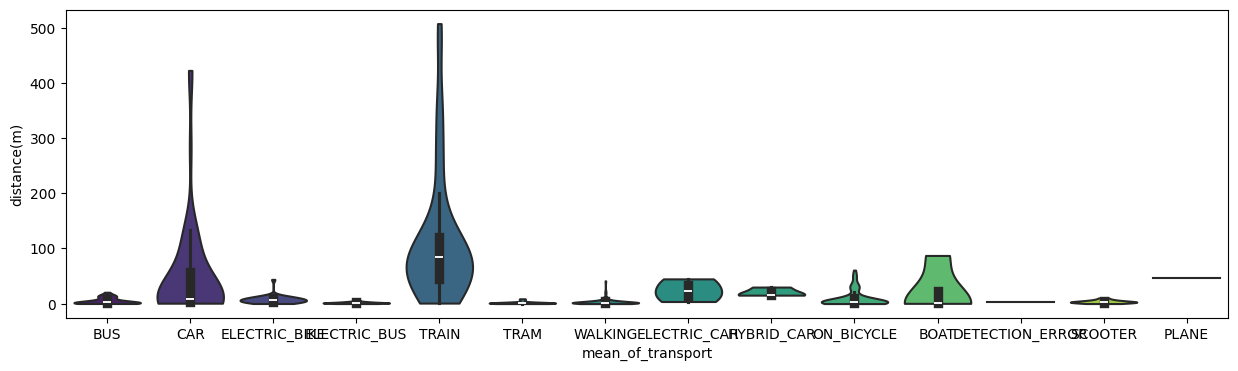

In [14]:
# Plot as violin plot
plt.figure(figsize=(15, 4))
sns.violinplot(x='mean_of_transport', y='distance(m)', data=dist_per_day, inner='box', linewidth=1.5, saturation=0.8, width=0.8, cut=0, palette='viridis')

/var/folders/0v/mryc8sr57kb1272k8bhj0z083fl3sj/T/ipykernel_12485/3832359373.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='mean_of_transport', y='distance(m)', data=long, inner='box', linewidth=1.5, saturation=0.8, width=0.8, cut=0, palette='viridis') # Long distance
/var/folders/0v/mryc8sr57kb1272k8bhj0z083fl3sj/T/ipykernel_12485/3832359373.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='mean_of_transport', y='distance(m)', data=short, inner='box', linewidth=1.5, saturation=0.8, width=0.8, cut=0, palette='viridis') # Short distance


<Axes: xlabel='mean_of_transport', ylabel='distance(m)'>

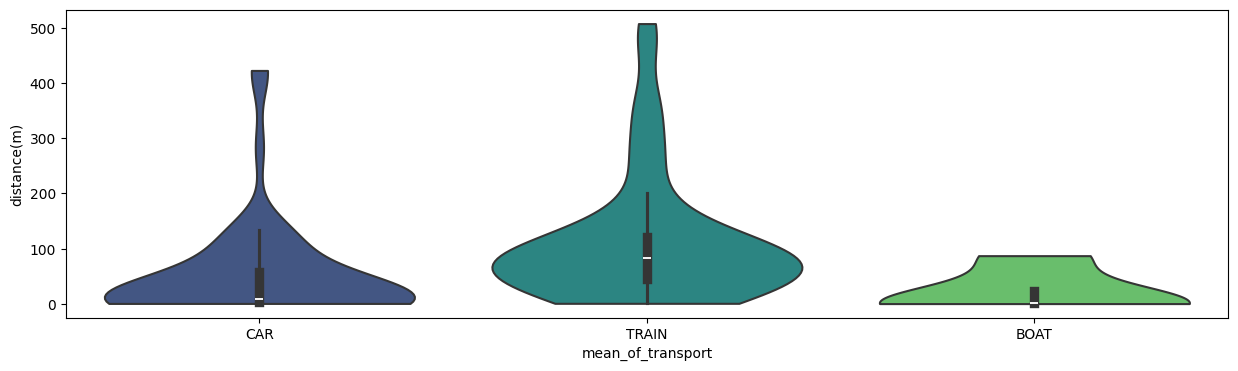

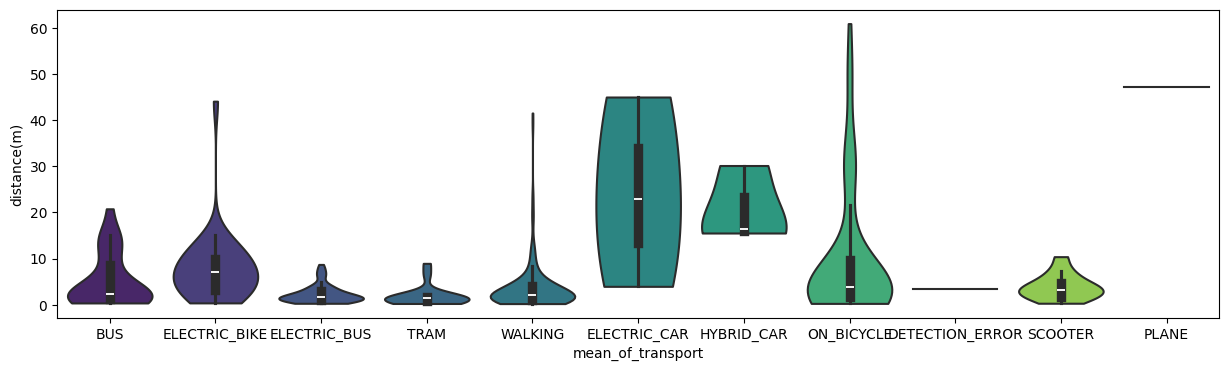

In [15]:
# Separate car, train, boat from the rest and plot
long = dist_per_day[dist_per_day['mean_of_transport'].isin(['CAR', 'TRAIN', 'BOAT'])]
short = dist_per_day[~dist_per_day['mean_of_transport'].isin(['CAR', 'TRAIN', 'BOAT'])]

plt.figure(figsize=(15, 4))
sns.violinplot(x='mean_of_transport', y='distance(m)', data=long, inner='box', linewidth=1.5, saturation=0.8, width=0.8, cut=0, palette='viridis') # Long distance

plt.figure(figsize=(15, 4))
sns.violinplot(x='mean_of_transport', y='distance(m)', data=short, inner='box', linewidth=1.5, saturation=0.8, width=0.8, cut=0, palette='viridis') # Short distance

## Create a visualization of the covered routes

In [16]:
## Get a coordinate from a geohash, adding a small random offset to avoid overlapping
def geohash_to_coordinate(geohash):
    lat, lon = geolib.decode(geohash)
    #lat = float(lat) + 0.00000001#(random.random() - 0.5) * 0.00000001
    #lon = float(lon) + 0.00000001#(random.random() - 0.5) * 0.00000001
    return [float(lat), float(lon)]

In [17]:
## Draw a path from start_geohash to end_geohash on a folium map
def draw_path(start_geohash, end_geohash, mean_of_transport, map, weight=1, tooltip=None):
    ## Give a different color to each mean of transport
    colors = {
        'WALKING': '#7FC97F',
        'ON_BICYCLE': '#BDAED4',
        'ELECTRIC_BIKE': '#BDAED4',
        'SCOOTER': '#BDAED4',
        'TRAIN': '#FDBF85',
        'BUS': '#FFFF99',
        'ELECTRIC_BUS': '#FFFF99',
        'CAR': '#386CB0',
        'ELECTRIC_CAR': '#386CB0',
        'HYBRID_CAR': '#386CB0',
        'TRAM': '#F0027F',
        'PLANE': '#BE5B17',
        'BOAT': '#BE5B17',
        'DETECTION_ERROR': '#000000'
    }
    start_coord = geohash_to_coordinate(start_geohash)
    end_coord = geohash_to_coordinate(end_geohash)

    # Add a small offset to avoid overlapping
    start_coord[0] += (random.random() - 0.5) * 0.001
    start_coord[1] += (random.random() - 0.5) * 0.001
    end_coord[0] += (random.random() - 0.5) * 0.001
    end_coord[1] += (random.random() - 0.5) * 0.001

    #arc_drawer.draw_arc(map, start_coord[0], start_coord[1], end_coord[0], end_coord[1], color=colors[mean_of_transport], weight = weight)

    folium.PolyLine(locations=[start_coord, end_coord], color=colors[mean_of_transport], weight=weight, tooltip=tooltip).add_to(map)


In [18]:
## Create the actual folium map
m = folium.Map(location=[46.9446011, 7.4143311], zoom_start=6, tiles='https://tiles.stadiamaps.com/tiles/stamen_toner_lite/{z}/{x}/{y}{r}.png?api_key=977802c5-9b2e-4fc3-9254-a9199d0d5d0c', attr='https://stadiamaps.com/')

# Count the number of movements with the same combination of start_geohash and end_geohash (or vice-versa)
df['start_end_geohash'] = df['start_geohash'] + df['end_geohash']
df['end_start_geohash'] = df['end_geohash'] + df['start_geohash']

## Get the number of movements with the same combination of start_geohash and end_geohash (or vice-versa)
start_end = df['start_end_geohash'].value_counts()
end_start = df['end_start_geohash'].value_counts()

## Create a list with the sum of the two previous lists, when the index is the same
combined = {}

for index, row in start_end.items():
    if index in end_start:
        combined[index] = row + end_start[index]
    else:
        combined[index] = row

for index, row in end_start.items():
    if index not in combined:
        combined[index] = row

## Convert combined to series
combined = pd.Series(combined)

# Log scaling
combined = combined.apply(lambda x: math.log(x) + 1)

# Draw path for each movement in start_end
for index, row in combined.items():
    start_geohash = index[0:len(index)//2]
    end_geohash = index[len(index)//2:len(index)] 

    try:
        mean_of_transport = df.loc[(df['start_geohash'] == start_geohash) & (df['end_geohash'] == end_geohash), 'mean_of_transport'].iloc[0]
    except:
        mean_of_transport = df.loc[(df['end_geohash'] == start_geohash) & (df['start_geohash'] == end_geohash), 'mean_of_transport'].iloc[0]

    draw_path(start_geohash, end_geohash, mean_of_transport, m, weight = row/max(combined)*7)

## Draw a path for each movement
#for index, row in df.iterrows():
#    draw_path(row['start_geohash'], row['end_geohash'], row['mean_of_transport'], m)

## Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

## Save the map as an html file
m.save('maps/paths_map.html')


## Create a heatmap of the locations visited

In [19]:
## Extract from df a list of all start_geohashes and end_geohashes
geohashes = list(df['start_geohash']) + list(df['end_geohash'])
len(geohashes)

3142

In [20]:
# If we want, we can remove some characters from the end of each geohash to reduce the precision
geohashes = [geohash[:-1] for geohash in geohashes]

In [21]:
# Convert the list of geohashes to a dataframe
geohashes_df = gpd.GeoDataFrame(geohashes, columns=['geohash'])

## Convert the list of geohashes to a geoJSON object


In [22]:
## Convert geohashes to a heatmap in geojson format
def geohashes_to_heatmap(df):
    # Get the distinct geohashes and their counts from the dataframe
    geohashes = df['geohash'].value_counts()

    # Get the maximum count of any geohash
    max_count = math.log(geohashes.max())

    # Convert the geohashes to a list of lists, each containing the geohash and its count
    geohashes = [[geohash, count] for geohash, count in zip(geohashes.index, geohashes)]
    
    # Create a color scale for the heatmap
    color_scale = linear.RdYlBu_10.scale(1, max_count)

    # Convert geohashes to features for geoJSON
    features = []

    for geohash in geohashes:
        # Get the bounds of the geohash
        bounds = geolib.bounds(geohash[0])
        color = color_scale(math.log(geohash[1]))

        # Create a feature for the geohash
        features.append({
            "type": "Feature",
            "properties": {
                "id": geohash[0],
                "fillColor": color,
                "fillOpacity": 0.6,
                "stroke": False
            },
            "geometry": {
                "type": "Polygon",
                "coordinates": [[
                    [bounds.sw.lon, bounds.sw.lat],
                    [bounds.sw.lon, bounds.ne.lat],
                    [bounds.ne.lon, bounds.ne.lat],
                    [bounds.ne.lon, bounds.sw.lat],
                    [bounds.sw.lon, bounds.sw.lat]
                ]]
            },
        })

    # Convert the geohashes to a heatmap in geojson format
    return {
        "type" : "FeatureCollection",
        "features": features
    }

In [23]:
# Convert the geohashes to a heatmap in geojson format
heatmap = geohashes_to_heatmap(geohashes_df)

# Save GeoJSON with double quotes
with open('results/heatmap.geojson', 'w') as f:
    json.dump(heatmap, f)

In [24]:
# Visualize as a heatmap using Folium
# Create a folium map centered at an initial location
def create_map(geojson, mapname, legend=None):
    m = folium.Map(location=[46.9446011, 7.4143311],zoom_start=6, tiles='https://tiles.stadiamaps.com/tiles/stamen_toner_lite/{z}/{x}/{y}{r}.png?api_key=977802c5-9b2e-4fc3-9254-a9199d0d5d0c', attr='https://stadiamaps.com/')

    # Define a style function to set the color of the polygon
    def style_function(feature):
        return {
            'fillColor': feature["properties"]["fillColor"],  # Change this to the desired color
            'stroke': feature["properties"]["stroke"],
            'fillOpacity': feature["properties"]["fillOpacity"],
        }

    # Add GeoJSON data to the map with the style function
    folium.GeoJson(
        geojson,
        name='Polygon Layer',
        style_function=style_function,
    ).add_to(m)

    # Add Layer Control to the map
    folium.LayerControl().add_to(m)

    if legend:
        m.get_root().html.add_child(folium.Element(legend))

    # Save or display the map
    m.save("maps/"+mapname)


In [25]:
create_map(heatmap, "heatmap.html")

In [27]:
!open -a Arc maps/heatmap.html

## Get the map of the most used vehicles

In [28]:
## Get the list of geohashes with the corresponding mean of transport
geohashes = df[['start_geohash', 'mean_of_transport']].copy()
## Append the end_geohashes to the list of geohashes
geohashes = gpd.GeoDataFrame(pd.concat([geohashes, df[['end_geohash', 'mean_of_transport']]]))
## Merge start_geohashes and end_geohashes into a single column
geohashes['geohash'] = geohashes['start_geohash'].combine_first(geohashes['end_geohash'])
## Remove the start_geohashes and end_geohashes columns
geohashes = geohashes[['geohash', 'mean_of_transport']]

## Reduce precision of geohashes
geohashes['geohash'] = geohashes['geohash'] #.str[:-1]

geohashes

,geohash,mean_of_transport
0,u0m44x,ON_BICYCLE
1,u0m44z,WALKING
2,u0m46b,ON_BICYCLE
3,u0m3ed,WALKING
4,u0kb8b,TRAIN
...,...,...
1566,u0m468,WALKING
1567,u0m44y,ELECTRIC_BUS
1568,u0m44y,WALKING
1569,u0m44x,WALKING


In [29]:
## Find the mean of transport that occurs the more often for each geohash and keep only the first one (the most used)
geohashes_df = gpd.GeoDataFrame(geohashes, columns=['geohash', 'mean_of_transport'])
# Get the count of the mean of transport for each geohash
geohashes_df = geohashes_df.groupby(['geohash', 'mean_of_transport']).size().reset_index(name='counts')
# For each geohash, keep only the mean of transport that occurs the most often
geohashes_df = geohashes_df.sort_values('counts', ascending=False).drop_duplicates(['geohash'])
# Remove the counts column
#geohashes_df = geohashes_df[['geohash', 'mean_of_transport']]
geohashes_df

,geohash,mean_of_transport,counts
257,u0m44x,WALKING,230
281,u0m468,WALKING,94
287,u0m46b,WALKING,91
263,u0m44y,WALKING,68
383,u0m70d,ON_BICYCLE,61
...,...,...,...
175,u0kfk9,ON_BICYCLE,1
494,u0mhhg,CAR,1
493,u0mhhf,SCOOTER,1
178,u0kfkd,ON_BICYCLE,1


In [32]:
## Convert geohashes to a heatmap in geojson format
def heatmap_mot(df):
    ## Give a different color to each mean of transport
    colors = {
        'WALKING': '#7FC97F',
        'ON_BICYCLE': '#BDAED4',
        'ELECTRIC_BIKE': '#BDAED4',
        'SCOOTER': '#BDAED4',
        'TRAIN': '#FDBF85',
        'BUS': '#FFFF99',
        'ELECTRIC_BUS': '#FFFF99',
        'CAR': '#386CB0',
        'ELECTRIC_CAR': '#386CB0',
        'HYBRID_CAR': '#386CB0',
        'TRAM': '#F0027F',
        'PLANE': '#BE5B17',
        'BOAT': '#BE5B17'
    }

    # Convert geohashes to features for geoJSON
    features = []

    for geohash in df:
        # Get the bounds of the geohash
        bounds = geolib.bounds(geohash[0])
        color = colors[geohash[1]]

        # Create a feature for the geohash
        features.append({
            "type": "Feature",
            "properties": {
                "id": geohash[0],
                "fillColor": color,
                "fillOpacity": 0.8,
                "stroke": False
            },
            "geometry": {
                "type": "Polygon",
                "coordinates": [[
                    [bounds.sw.lon, bounds.sw.lat],
                    [bounds.sw.lon, bounds.ne.lat],
                    [bounds.ne.lon, bounds.ne.lat],
                    [bounds.ne.lon, bounds.sw.lat],
                    [bounds.sw.lon, bounds.sw.lat]
                ]]
            },
        })

    # Convert the geohashes to a heatmap in geojson format
    return {
        "type" : "FeatureCollection",
        "features": features
    }

In [33]:
# Convert the means of transport to a heatmap in geojson format
heatmap = heatmap_mot(geohashes_df.values)

# Save GeoJSON with double quotes
with open('results/heatmap_mot.geojson', 'w') as f:
    json.dump(heatmap, f)

In [34]:
create_map(heatmap, "heatmap_mot.html", legend_html)

In [35]:
!open -a Arc maps/heatmap_mot.html

## Get the map of the movements (start to end point)

In [36]:
# Now we should create a map with lines between the geohashes, with the color of the line corresponding to the mean of transport
# We should also create a legend for the map

## Create the actual folium map
m = folium.Map(location=[46.9446011, 7.4143311], zoom_start=8, tiles='https://tiles.stadiamaps.com/tiles/stamen_toner_lite/{z}/{x}/{y}{r}.png?api_key=977802c5-9b2e-4fc3-9254-a9199d0d5d0c', attr='https://stadiamaps.com/')
# Draw a path for each movement
for index, row in df.iterrows():
    draw_path(row['start_geohash'], row['end_geohash'], row['mean_of_transport'], m, weight = 2, tooltip=row['participant_id'])


## Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

## Save the map as an html file
m.save('maps/paths_map_mot.html')

!open -a Arc maps/paths_map_mot.html